In [42]:
import pandas as pd
import os
import plotly
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import datetime


## Appointments:  How did you try to book the appointment?

In [2]:
# import csv file
appointment_types = pd.read_csv('data/Appoinment_types.csv', sep=',', header=0)
# rename blank first col
appointment_types.rename({' ':'Appointemnt Types'}, axis=1, inplace=True)
appointment_types

,Appointemnt Types,2018,2019,2020,2021
0,To speak to someone on the phone,58654,60756,59375,309311
1,To speak to someone online (for example on a v...,393,596,970,17047
2,To see someone at another general practice loc...,20082,24930,26545,16622
3,To see someone at my GP practice,548877,549943,514151,313459
4,For a home visit,5351,4944,4451,3228


In [62]:
# create a dict of appointments and there coresponding type
grouptype = {
    'To speak to someone on the phone': 'Remote',
    'To speak to someone online (for example on a video call)': 'Remote',
    'To see someone at another general practice location': 'In person',
    'To see someone at my GP practice': 'In person',
    'For a home visit': 'In person'
    }
# make a new col that maps the groups to the appointments
appointment_types['Group Type'] = appointment_types['Appointemnt Types'].map(grouptype)
appointment_types

,Appointemnt Types,2018,2019,2020,2021,Group Type
0,To speak to someone on the phone,58654,60756,59375,309311,Remote
1,To speak to someone online (for example on a v...,393,596,970,17047,Remote
2,To see someone at another general practice loc...,20082,24930,26545,16622,In person
3,To see someone at my GP practice,548877,549943,514151,313459,In person
4,For a home visit,5351,4944,4451,3228,In person


In [68]:
# now we can groupby type and sum the yearly counts
appointment_types_group = appointment_types.groupby('Group Type').sum().reset_index()
# melt is like an inverse pivot, changing the data to 'long' format (one observeation per row)
appointment_types_group = pd.melt(appointment_types_group, id_vars='Group Type', value_vars=['2018', '2019', '2020', '2021'])
appointment_types_group.columns = ["Appointment Type", "Year", "Count"]
appointment_types_group

,Appointment Type,Year,Count
0,In person,2018,574310
1,Remote,2018,59047
2,In person,2019,579817
3,Remote,2019,61352
4,In person,2020,545147
5,Remote,2020,60345
6,In person,2021,333309
7,Remote,2021,326358


In [69]:
# use groupby on years to get the total counts
appointment_year_total = appointment_types_group.groupby('Year').sum().reset_index()
appointment_year_total.rename(columns={'Count': 'Total'}, inplace=True)
appointment_year_total 

,Year,Total
0,2018,633357
1,2019,641169
2,2020,605492
3,2021,659667


In [70]:
# merge the totals back to the df
appointment_types_group = pd.merge(appointment_types_group, appointment_year_total, on='Year', how='left')
# calculate percentages
appointment_types_group['Percent'] = appointment_types_group['Count']/appointment_types_group['Total']
appointment_types_group['Percent'] = pd.Series(["{0:.1f}%".format(val * 100) for val in appointment_types_group['Percent']], index = appointment_types_group.index)
appointment_types_group

,Appointment Type,Year,Count,Total,Percent
0,In person,2018,574310,633357,90.7%
1,Remote,2018,59047,633357,9.3%
2,In person,2019,579817,641169,90.4%
3,Remote,2019,61352,641169,9.6%
4,In person,2020,545147,605492,90.0%
5,Remote,2020,60345,605492,10.0%
6,In person,2021,333309,659667,50.5%
7,Remote,2021,326358,659667,49.5%


In [101]:
# plot the long (tidy) dataframe
fig = px.bar(
    appointment_types_group,
    x="Year",
    y="Percent",
    color="Appointment Type",
    # I would use the website to write chart titles in the correct font/foramt/spacing
    #title="Remote appointments are now as common as in person appointments",
    barmode="stack",
    text="Percent",
)

# Asthetics of the plot
fig.update_layout(
    # change background colour 
    {"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"},
    xaxis_title='Year',
    xaxis=dict(tickformat="%y"),
    # change fonts
    font=dict(family="Arial", size=16),
    # autosize makes the chart 'responsive' (https://en.wikipedia.org/wiki/Responsive_web_design)
    autosize=True,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4,
        autoexpand=True
        ),
    ## options for the hover-over text
    # changes how the hover-over box is displayed
    hovermode="x unified",
    # hoverlabel_align = 'right',
    # changes the hover-over box formatting
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    )
)

# options to change how the bars look
fig.update_traces(
    # this also changes the hover-over box formatting
    hovertemplate='%{fullData.name}: %{text}<extra></extra>',
    # outline of bars
    marker_line_color = 'rgb(8,48,107)',
    marker_line_width=0,
    opacity=1,
    # options for text inside bars
    # texttemplate='%{text:.2%}', <- not needed in this case
    textposition='inside'
)
fig.update_xaxes(type='category')
fig.show()

In [43]:
# Write chart to file (.html)
config = {"displayModeBar": False, "displaylogo": False}
plotly_obj = plotly.offline.plot(
    fig, include_plotlyjs=False, output_type="div", config=config
)
with open("_includes/remote_appts.html", "w") as file:
    file.write(plotly_obj)

## GP online services:  Which of the following general practice online services have you used in the past 12 months?

In [16]:
online_services = pd.read_csv (r'/Users/mary.amanuel/Desktop/digital health insights/cleaned data/GPPS2021_csv/Online_services.csv')
online_services.columns = ["Activity", "over_seventy_five", "over_seventy_five_p", "national", "national_p","over_seventy_five_from_national" ]

online_services

,Activity,over_seventy_five,over_seventy_five_p,national,national_p,over_seventy_five_from_national
0,Booking appointments online,8710,0.09,155845,0.15,0.06
1,Ordering repeat prescriptions online,19830,0.20,217730,0.21,0.09
2,Accessing my medical records online,2653,0.03,58910,0.06,0.05
3,Had an online consultation or appointment,9408,0.10,148409,0.14,0.06
4,None of these,56408,0.58,465384,0.44,0.12


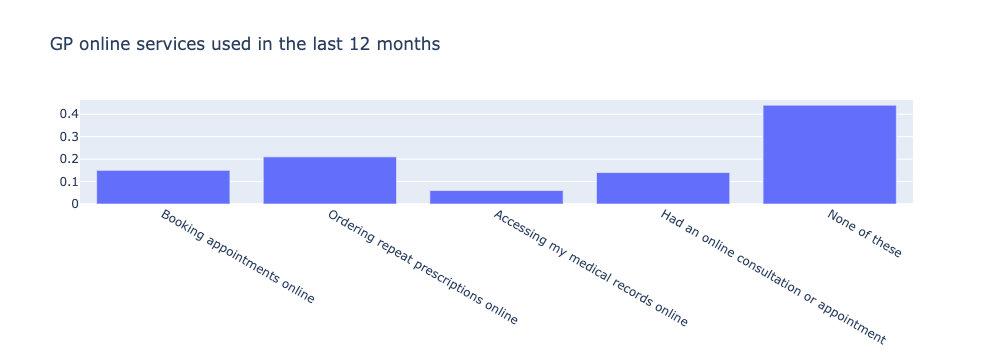

In [21]:
data3 = go.Bar (
    x = online_services.Activity,
    y = online_services.national_p, name = 'National' )

layout = go.Layout(title = 'GP online services used in the last 12 months')

figure = go.Figure(data = data3, layout = layout)

figure.show()

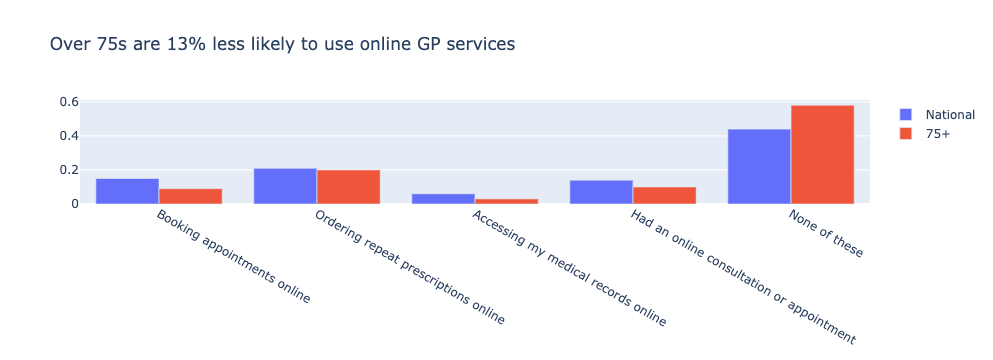

In [22]:
data3 = go.Bar (
    x = online_services.Activity,
    y = online_services.national_p, name = 'National' )

data4 = go.Bar (
    x = online_services.Activity,
    y = online_services.over_seventy_five_p, name = '75+')

data = [data3, data4]

layout = go.Layout(title = 'Over 75s are 13% less likely to use online GP services')

figure = go.Figure(data = data, layout = layout)
figure.show()

## How easy is it to use your GP practice’s website to look for information or access services?


## 16-24s (2018 - 2021)

In [7]:
ease_16_24 = pd.read_csv (r'/Users/mary.amanuel/Desktop/digital health insights/cleaned data/GPPS2021_csv/use_16_24.csv', header = 0)
                                                                                                                                                 
ease_16_24.columns = ["Year", "Easy"]
ease_16_24 = ease_16_24.astype({"Year": str, "Easy": str})

ease_16_24['Easy'] = ease_16_24['Easy'].str[:-1].astype('float64')/ 100.0


ease_16_24

,Year,Easy
0,2018,0.74
1,2019,0.73
2,2020,0.73
3,2021,0.75


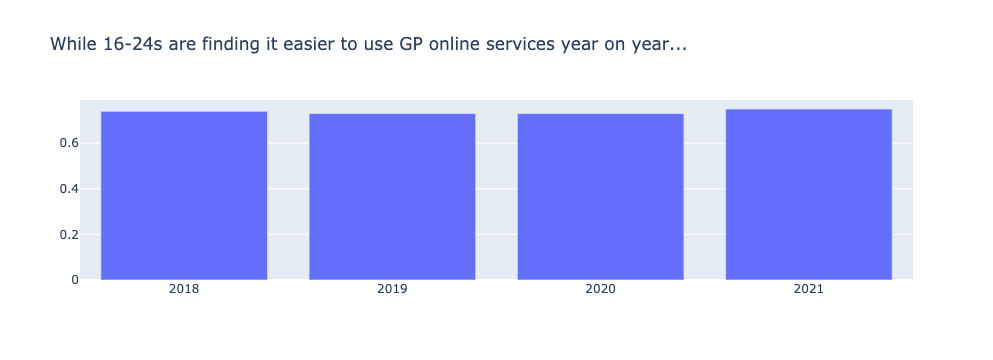

In [8]:
data0 = go.Bar(
    x = ease_16_24.Year,
    y = ease_16_24.Easy,
    name = "Easy")

layout = go.Layout(title = ' While 16-24s are finding it easier to use GP online services year on year...', )

figure2 = go.Figure(data = data0, layout = layout)
figure2.show()


## Over 75s (2018 - 2021)


In [10]:
ease_use_75_and_over = pd.read_csv (r'/Users/mary.amanuel/Desktop/digital health insights/cleaned data/GPPS2021_csv/Ease_of_use_over_time_75+.csv', header = 0)
ease_use_75_and_over.columns = ["Year", "Easy_N", "Not-Easy_N", "Total", "Easy_P", "Not_Easy_P"]
ease_use_75_and_over = ease_use_75_and_over.astype({"Year": str})
ease_use_75_and_over

,Year,Easy_N,Not-Easy_N,Total,Easy_P,Not_Easy_P
0,2018,10540,1973,12513,0.84,0.16
1,2019,11876,2807,14683,0.81,0.19
2,2020,13080,3313,16393,0.80,0.20
3,2021,18403,6194,24597,0.75,0.25


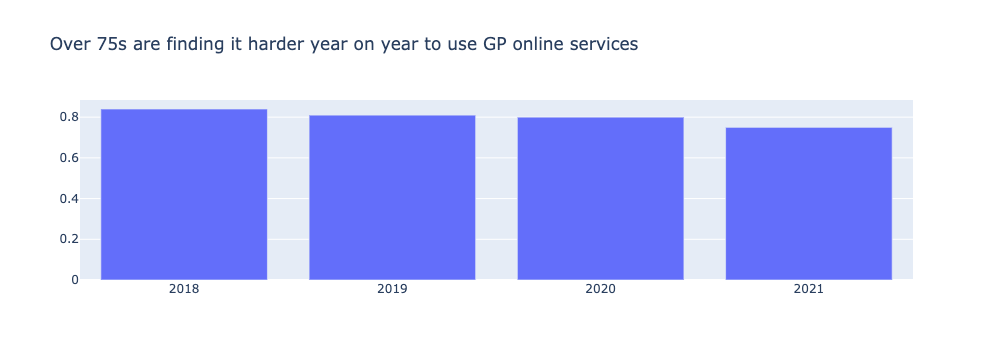

In [12]:
data0 = go.Bar (x = ease_use_75_and_over.Year,
    y = ease_use_75_and_over.Easy_P, name = "Ease" )

layout = go.Layout(title = 'Over 75s are finding it harder year on year to use GP online services')

figure = go.Figure(data = data0, layout = layout)
figure.show()

## Patients with long term health condition  (2018 - 2021)

In [24]:
ease_use_LTC_vs_no_LTC = pd.read_csv (r'/Users/mary.amanuel/Library/Containers/com.microsoft.Excel/Data/Desktop/digital health insights/cleaned data/GPPS2021_csv/use_2021_time_long_term_condition.csv')
ease_use_LTC_vs_no_LTC

,Condition,Percentage,Year
0,No long term condition,0.77,2021
1,Long term condition,0.74,2021


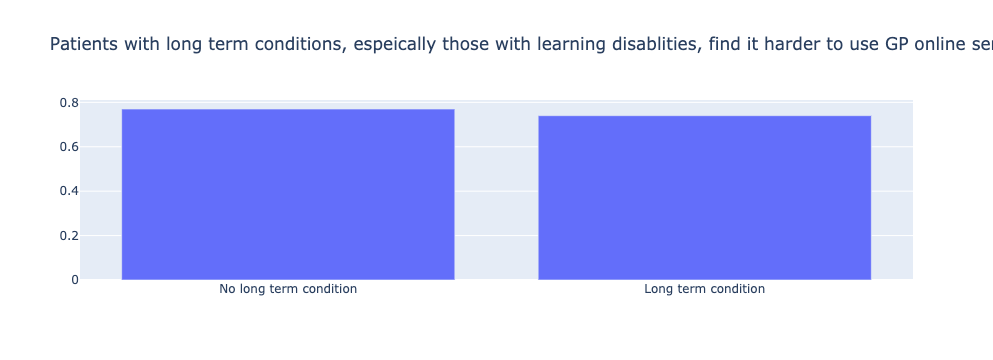

In [14]:
data0 = go.Bar (
    x = ease_use_LTC_vs_no_LTC.Condition,
    y = ease_use_LTC_vs_no_LTC.Percentage )

layout = go.Layout(title = 'Patients with long term conditions, espeically those with learning disablities, find it harder to use GP online services')

figure = go.Figure(data = data0, layout = layout)
figure.show()